In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

#from tensorflow.data.Dataset import load
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pandas as pd

import os
from file_helpers import unpickle_from_file

2024-03-12 04:35:37.161041: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
train_labels_sorted = unpickle_from_file('../data/processed_data/train_labels_sorted.bin')

In [3]:
#Read training data
batch_size = 100
img_height = 227
img_width = 227

train_ds = tf.keras.utils.image_dataset_from_directory(
  '../data/processed_data/training_images',
  validation_split=0.15,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
labels = train_labels_sorted)

Found 51957 files belonging to 8 classes.
Using 44164 files for training.


2024-03-12 04:35:42.481073: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [4]:
#Read validation data

val_ds = tf.keras.utils.image_dataset_from_directory(
  '../data/processed_data/training_images',
  validation_split=0.15,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
labels = train_labels_sorted)

Found 51957 files belonging to 8 classes.
Using 7793 files for validation.


In [5]:
#Try to keep things in memory for performance reasons
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [6]:
img_height = 227
img_width = 227

num_classes = 8

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
epochs=10

#Silence debug messages for cleaner output
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

history = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs = epochs
)

Epoch 1/10


2024-03-12 04:35:46.160078: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [44164]
	 [[{{node Placeholder/_4}}]]
2024-03-12 04:35:46.160839: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [44164]
	 [[{{node Placeholder/_4}}]]
2024-03-12 04:35:57.620562: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 384 of 1000
2024-03-12 04:36:00.208630: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.


442/442 [==============================] - ETA: 0s - loss: 0.6729 - accuracy: 0.8241

2024-03-12 05:09:24.633175: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [7793]
	 [[{{node Placeholder/_0}}]]
2024-03-12 05:09:24.634928: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [7793]
	 [[{{node Placeholder/_0}}]]


442/442 [==============================] - 2050s 5s/step - loss: 0.6729 - accuracy: 0.8241 - val_loss: 1.1004 - val_accuracy: 0.7822
Epoch 2/10
442/442 [==============================] - 2122s 5s/step - loss: 0.4723 - accuracy: 0.8596 - val_loss: 1.3269 - val_accuracy: 0.7530
Epoch 3/10
442/442 [==============================] - 2111s 5s/step - loss: 0.3714 - accuracy: 0.8847 - val_loss: 1.5643 - val_accuracy: 0.7399
Epoch 4/10
442/442 [==============================] - 2071s 5s/step - loss: 0.2985 - accuracy: 0.9041 - val_loss: 1.6970 - val_accuracy: 0.7226
Epoch 5/10
442/442 [==============================] - 2073s 5s/step - loss: 0.2372 - accuracy: 0.9212 - val_loss: 1.8863 - val_accuracy: 0.7353
Epoch 6/10
442/442 [==============================] - 2190s 5s/step - loss: 0.1827 - accuracy: 0.9380 - val_loss: 2.3179 - val_accuracy: 0.7260
Epoch 7/10
442/442 [==============================] - 2182s 5s/step - loss: 0.1414 - accuracy: 0.9520 - val_loss: 2.6636 - val_accuracy: 0.7273
Epo

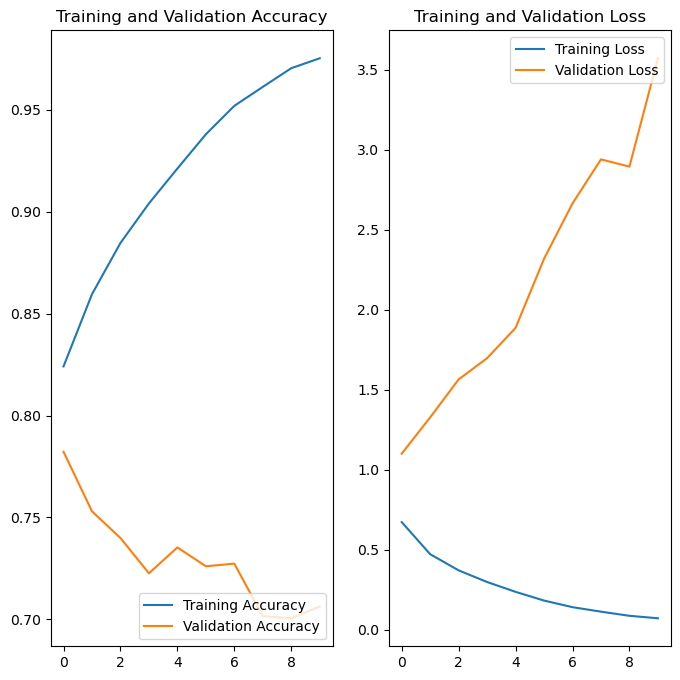

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [10]:
#Read training data
batch_size = 75
img_height = 227
img_width = 227

train_ds = tf.keras.utils.image_dataset_from_directory(
  '../data/processed_data/training_images',
  validation_split=0.15,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
labels = train_labels_sorted)

Found 51957 files belonging to 8 classes.
Using 44164 files for training.


In [11]:
#Read validation data

val_ds = tf.keras.utils.image_dataset_from_directory(
  '../data/processed_data/training_images',
  validation_split=0.15,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
labels = train_labels_sorted)

Found 51957 files belonging to 8 classes.
Using 7793 files for validation.


In [12]:
img_height = 227
img_width = 227

num_classes = 8

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
epochs=10

#Silence debug messages for cleaner output
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

history = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs = epochs
)

Epoch 1/10


2024-03-12 10:32:44.569581: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [44164]
	 [[{{node Placeholder/_4}}]]
2024-03-12 10:32:44.570127: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [44164]
	 [[{{node Placeholder/_4}}]]


589/589 [==============================] - ETA: 0s - loss: 0.8196 - accuracy: 0.8117

2024-03-12 11:10:39.827558: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [7793]
	 [[{{node Placeholder/_4}}]]
2024-03-12 11:10:39.828410: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [7793]
	 [[{{node Placeholder/_4}}]]


589/589 [==============================] - 2308s 4s/step - loss: 0.8196 - accuracy: 0.8117 - val_loss: 0.7938 - val_accuracy: 0.8160
Epoch 2/10
589/589 [==============================] - 2343s 4s/step - loss: 0.8011 - accuracy: 0.8127 - val_loss: 0.7914 - val_accuracy: 0.8160
Epoch 3/10
589/589 [==============================] - 2153s 4s/step - loss: 0.8013 - accuracy: 0.8127 - val_loss: 0.7911 - val_accuracy: 0.8160
Epoch 4/10
589/589 [==============================] - 2367s 4s/step - loss: 0.8014 - accuracy: 0.8127 - val_loss: 0.7912 - val_accuracy: 0.8160
Epoch 5/10
589/589 [==============================] - 2110s 4s/step - loss: 0.7981 - accuracy: 0.8127 - val_loss: 0.7914 - val_accuracy: 0.8160
Epoch 6/10
589/589 [==============================] - 2270s 4s/step - loss: 0.7938 - accuracy: 0.8127 - val_loss: 0.7934 - val_accuracy: 0.8157
Epoch 7/10
589/589 [==============================] - 2208s 4s/step - loss: 0.7874 - accuracy: 0.8127 - val_loss: 0.7958 - val_accuracy: 0.8159
Epo

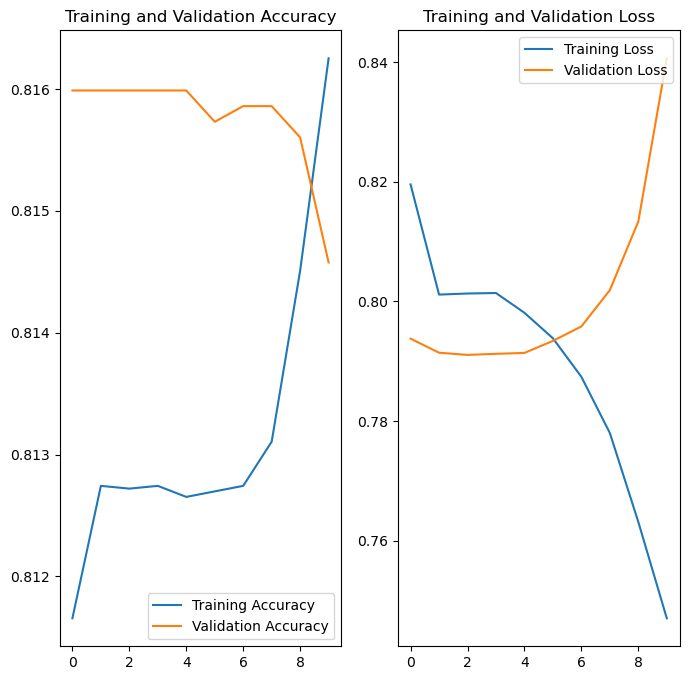

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
#Read training data
batch_size = 50
img_height = 227
img_width = 227

train_ds = tf.keras.utils.image_dataset_from_directory(
  '../data/processed_data/training_images',
  validation_split=0.15,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
labels = train_labels_sorted)

Found 51957 files belonging to 8 classes.
Using 44164 files for training.


In [17]:
#Read validation data

val_ds = tf.keras.utils.image_dataset_from_directory(
  '../data/processed_data/training_images',
  validation_split=0.15,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
labels = train_labels_sorted)

Found 51957 files belonging to 8 classes.
Using 7793 files for validation.


In [18]:
img_height = 227
img_width = 227

num_classes = 8

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
epochs=10

#Silence debug messages for cleaner output
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

history = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs = epochs
)

Epoch 1/10


2024-03-12 16:48:22.653925: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [44164]
	 [[{{node Placeholder/_4}}]]
2024-03-12 16:48:22.654388: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [44164]
	 [[{{node Placeholder/_4}}]]


884/884 [==============================] - ETA: 0s - loss: 0.8231 - accuracy: 0.8135

2024-03-12 17:24:31.604786: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [7793]
	 [[{{node Placeholder/_4}}]]
2024-03-12 17:24:31.606368: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [7793]
	 [[{{node Placeholder/_4}}]]


884/884 [==============================] - 2210s 2s/step - loss: 0.8231 - accuracy: 0.8135 - val_loss: 0.7880 - val_accuracy: 0.8159
Epoch 2/10
884/884 [==============================] - 2405s 3s/step - loss: 0.7979 - accuracy: 0.8143 - val_loss: 0.7850 - val_accuracy: 0.8159
Epoch 3/10
884/884 [==============================] - 2189s 2s/step - loss: 0.7967 - accuracy: 0.8143 - val_loss: 0.7862 - val_accuracy: 0.8159
Epoch 4/10
884/884 [==============================] - 2319s 3s/step - loss: 0.7956 - accuracy: 0.8143 - val_loss: 0.7899 - val_accuracy: 0.8159
Epoch 5/10
884/884 [==============================] - 2375s 3s/step - loss: 0.7949 - accuracy: 0.8143 - val_loss: 0.7933 - val_accuracy: 0.8159
Epoch 6/10
884/884 [==============================] - 2388s 3s/step - loss: 0.7907 - accuracy: 0.8143 - val_loss: 0.7952 - val_accuracy: 0.8159
Epoch 7/10
884/884 [==============================] - 2389s 3s/step - loss: 0.7856 - accuracy: 0.8143 - val_loss: 0.8021 - val_accuracy: 0.8155
Epo

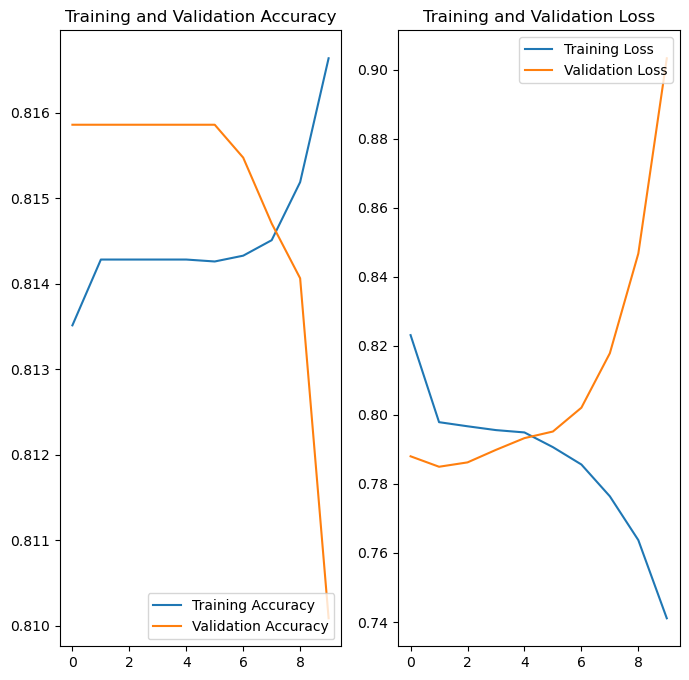

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()